In [326]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from mono_functions import create_mono_df,locate_max
from statistics import mean
from scipy.optimize import curve_fit

In [340]:
#choose filepath to desired data
path =  "C://Users//khart//Documents//IRCSP2_data//mono_data//"
name =  "cam1_test.h5" 

In [341]:
#will create a df and print the names of the keys in the original hdf5 file
df = create_mono_df(path,name)

Keys: <KeysViewHDF5 ['images', 'response', 'std', 'wavelengths']>


In [342]:
df

,images,response,std,wavelengths
0,"[[24264, 24251, 24259, 24272, 24272, 24262, 24...",24259.764413,10.659045,6.000000
1,"[[24263, 24249, 24260, 24267, 24272, 24260, 24...",24259.504950,10.634185,6.101266
2,"[[24242, 24236, 24236, 24230, 24234, 24236, 24...",24233.742575,11.106672,6.202532
3,"[[24210, 24204, 24210, 24195, 24203, 24206, 24...",24203.596550,11.568092,6.303797
4,"[[24176, 24173, 24166, 24177, 24180, 24164, 24...",24172.070650,11.391913,6.405063
...,...,...,...,...
75,"[[23525, 23535, 23521, 23527, 23515, 23516, 23...",23545.984887,29.625795,13.594937
76,"[[23504, 23524, 23522, 23516, 23514, 23517, 23...",23538.780237,29.892960,13.696203
77,"[[23491, 23515, 23496, 23499, 23506, 23507, 23...",23526.491375,29.926303,13.797468
78,"[[23482, 23502, 23492, 23495, 23493, 23496, 23...",23520.743050,30.342831,13.898734


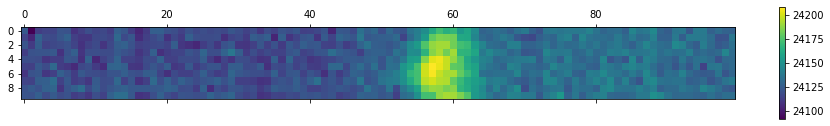

In [376]:

xmin= 110; xmax=120; ymin=100; ymax=200;
ROI= [xmin,xmax,ymin,ymax]


plt.matshow(df["images"][12][xmin:xmax,ymin:ymax])
plt.colorbar()
plt.show()

In [358]:
[value,loc] = locate_max(df,'images',2,xmin,xmax,ymin,ymax,1)
value

array([24248, 24247, 24243, 24255, 24249, 24250, 24253, 24248, 24253,
       24247], dtype=uint16)

In [377]:
#calculate location of maxvalues, add to database
maxlocs = []
maxvals = []

for i in range(0,len(df["wavelengths"])):
    [loc,value] = locate_max(df,'images',i,xmin+4,xmax-3,ymin,ymax,1)
    maxlocs.append(value)
    maxvals.append(loc)

df['max_vals'] = pd.Series(maxvals) 
df['max_locs'] = pd.Series(maxlocs) 
df['avg_val'] = df['max_vals'].map(mean)
df['avg_locs'] = df['max_locs'].map(mean)

In [378]:
# pixel fit 
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B


#fit over wavelengths with lowest noise
fitmin=15;
fitmax = 40;
popt, pcov = curve_fit(f, df['wavelengths'][fitmin:fitmax], df['avg_locs'][fitmin:fitmax]) # your data x, y to fit

In [379]:
df['fit'] =  popt[0] *  df['wavelengths'] + popt[1]

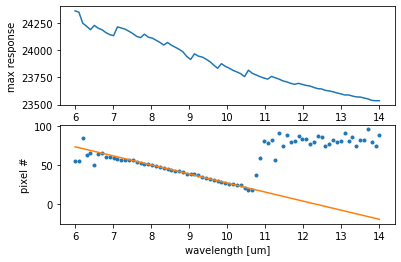

In [380]:
#plot and check fit 

plt.subplot(211)
plt.plot(df['wavelengths'],df['avg_val'])
plt.ylabel('max response')
plt.subplot(212)
plt.plot(df['wavelengths'],df['avg_locs'],'.')
plt.plot(df['wavelengths'],df['fit'],'-')
plt.xlabel('wavelength [um]')
plt.ylabel('pixel #')
plt.show()


In [307]:
#writetohdf5

#choose filepath to desired data
save_path =  "C://Users//khart//Documents//IRCSP2_data//calibration_files//"
name =  "12142020cal" 

#create hdf5 file
hf = h5py.File(save_path + name + '.h5', 'w')
hf.create_dataset('/pixel_registration/cam1/fitparams',  data=popt)
hf.create_dataset('/pixel_registration/cam1/ROI',        data= ROI)
hf.close()


In [323]:
rount(df['fit'][1]

71.62000002554097